In [1]:
# libraries
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

## 1. The Dataset: Titanic data

#### The Titanic dataset is a classification dataset: it is used for a prediction task where the goal is to determine whether a person survived the 1912 shipwreck of the RMS Titanic. The list of attributes is as follows:

- output variable: **Survival**, 0 = did not survive, 1 = did survive
- input features:
    - **Pclass**: ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
    - **Sex**: male or female
    - **Age**: quantitative continuous variable
    - **Sibsp**: # of siblings / spouses aboard the Titanic
    - **Parch**: # of parents / children aboard the Titanic	
    - **Ticket**: ticket number
    - **Fare**: passenger fare
    - **Cabin**: cabin number
    - **Embarked**: port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [2]:
df = pd.read_csv("titanic-train.csv", na_values=['none'])
df.fillna('', inplace=True)
df["Age"] = df["Age"].apply(lambda x: 0 if x == "" else x)
df["Cabin"] = df["Cabin"].apply(lambda x: "Unknown" if x == "" else x)
df["Embarked"] = df["Embarked"].apply(lambda x: "Unknown" if x == "" else x)
df["Pclass"] = df["Pclass"].apply(lambda x: str(x))


train_cols = [df.columns[0]] + list(df.columns[2:])
label = df.columns[1]
X_df = df[train_cols]
y_df = df[label]

dataset = {
    'X': X_df,
    'y': y_df
}

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [3]:
# Use this cell for any data-related exploration

## 2. The Model: GAMs

In [8]:
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.model_selection import train_test_split

# create a train/test split
seed = 1
X_train, X_test, y_train, y_test = train_test_split(dataset['X'],dataset['y'], test_size=0.25, random_state=seed)

# train a GAM for the training dataset
ebm = ExplainableBoostingClassifier()

ebm.fit(X_train, y_train)

ExplainableBoostingClassifier(feature_names=['PassengerId', 'Pclass', 'Name',
                                             'Sex', 'Age', 'SibSp', 'Parch',
                                             'Ticket', 'Fare', 'Cabin',
                                             'Embarked', 'Pclass x Sex',
                                             'Name x Ticket', 'Name x Fare',
                                             'Ticket x Fare', 'Sex x Age',
                                             'Sex x Ticket', 'Sex x Parch',
                                             'PassengerId x Pclass',
                                             'PassengerId x Embarked',
                                             'Name x Age'],
                              feature_types=['continuous', 'categorical',
                                             'categorical', 'categorical',
                                             'continuous', 'continuous',
                                             'cont

In [10]:
#Training accuracy
train_pred = ebm.predict(X_train).tolist()
train_pred = [0 if x<=0.5 else 1 for x in train_pred]
accuracy_train = round(sum(train_pred == y_train) / len(train_pred), 5)

#Test set accuracy
predictions = ebm.predict(X_test).tolist()
predictions = [0 if x <= 0.5 else 1 for x in predictions]

accuracy_test = round(sum(predictions == y_test) / len(predictions), 5)

print("The accuracy of the model on the training set is: ", accuracy_train)
print("The accuracy of the model on the test set is: ", accuracy_test)

indices = [index for index, value in enumerate(zip(predictions, y_test.tolist())) if value[0] != value[1]]

The accuracy of the model on the training set is:  0.90868
The accuracy of the model on the test set is:  0.79821


### Visualize Global Explanations: What the model learned overall from training data

In [11]:
from interpret import show 

ebm_global = ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7001/140526709771232/ -->

### Visualize Local Explanations: How an individual prediction was made

In [13]:
ebm_local = ebm.explain_local(X_test[:15], y_test[:15], name='EBM')
show(ebm_local)

<!-- http://127.0.0.1:7001/140526292575904/ -->

#### Local predictions

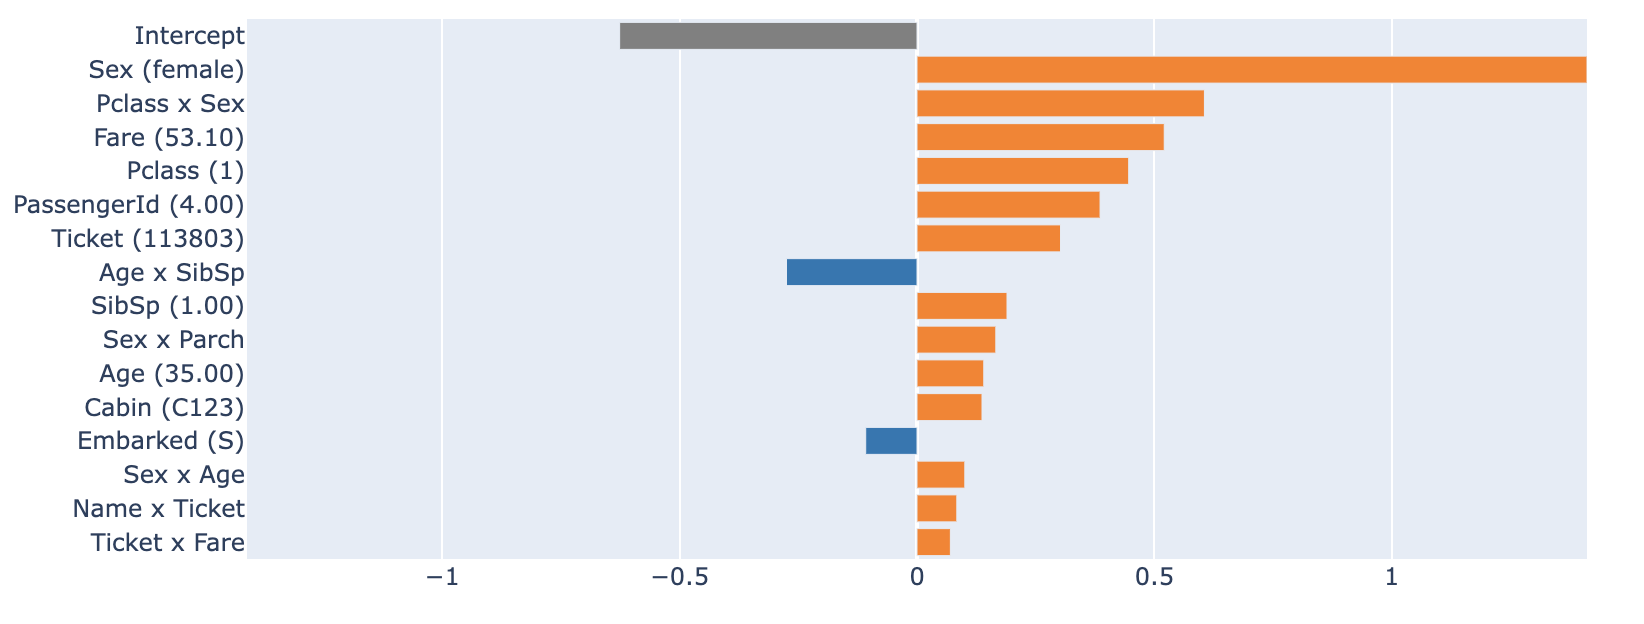

#### Local misclassification

In [25]:
ebm_local = ebm.explain_local(X_test[3:4], y_test[3:4], name='EBM')
show(ebm_local)

<!-- http://127.0.0.1:7001/140526347710912/ -->